
**EJERCICIO 1:**

Given a network in edge list format, make a simple but cool
computer program that reads and stores it in memory, and prints
the list of degrees, average degree $<k>$, and number of nodes N.

En el desarrollo de está práctica se realizará un código para analizar una red en el formato $\textit{Edge list}$, los resultados obtenidos se compararán con los proporcionados por el módulo de python $\textit{networks}$

Empezamos cargando los módulos necesarios para el desarrollo del trabajo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sys
import collections
from collections import Counter
from operator import itemgetter
import math as mp

**Sección 1: Entrada de la red**

A continuación leemos el archivo, si queremos introducirlo como input del programa: python redes.py edge_list.txt, prodecederíamos de la siguiente forma:

In [2]:
#input_archivo=sys.argv[1]
#edge_list = np.loadtxt(input_archivo, comments='%')

Sin embargo, nos encontramos en un notebook, por lo que se proporcionará el input directamente en el programa principal.

In [3]:
archivo='a1.edge'#cargamos el archivo
edge_list=np.loadtxt(archivo,comments='#')#borramos comentarios
#Si el formato es gml
#import networkx as nx
#g = nx.read_gml('polbooks.gml')
#nx.write_edgelist(g, 'edgelistFile.dat',delimiter=',')

**Sección 2: Cálculo de nodos y links**

De esta forma tenemos ya insertada en el programa nuestra red en formato de array, donde cada línea indica un tipo de interacción, es decir, un link. Siguiendo la notación de clase, esto corresponde con $\textbf{E}$, el número de links será igual al número de líneas no comentadas de nuestro archivo de entrada

In [4]:
E=len(edge_list[:,0])#el numero de links es igual al número de filas del archivo
print('Número total de links sin eliminar repetidos: ',E)
print(E,edge_list[:,1])

Número total de links sin eliminar repetidos:  781
781 [ 12.  27.  45.  47. 150. 158. 159.  18.  20.  27.  50.  69. 135. 136.
 158. 159.  13.  18.  20.  24.  26.  27.  29.  35.  36.  37.  41.  42.
  45.  47.  50.  52.  56.  62.  63.  65.  67.  68.  69.  70.  71.  74.
  85.  87.  91. 100. 101. 106. 109. 110. 111. 126. 128. 130. 132. 133.
 134. 135. 136. 138. 139. 141. 145. 150. 158. 159.  20.  22.  24.  26.
  27.  29.  35.  36.  37.  41.  42.  45.  47.  50.  52.  62.  63.  69.
  71.  87.  91. 100. 101. 106. 125. 132. 135. 136. 150. 158. 159.  24.
  37.  45.  47.  50.  52.  62.  65.  67.  69. 100. 106. 111. 126. 139.
 158. 159.  27.  29.  37.  45.  50.  52.  56.  62.  68.  69. 100. 101.
 117. 128. 130. 132. 135. 136. 138. 141. 145. 150. 157. 158. 159.  27.
  42.  50.  62.  63.  87. 109. 110. 125. 126. 139. 141. 145. 157. 158.
 159.  27.  29.  35.  37.  41.  45.  50.  52.  56.  62.  65.  67.  68.
  69.  85.  87.  91. 100. 101. 109. 126. 128. 130. 135. 136. 141. 150.
 158. 159.  27.  37.  

El número total de nodos $\textbf{N}$ se encontrará como el elemento máximo de alguna de las dos columnas de nuestro array, es decir:


In [5]:
#Si empieza nombrando al primer Nodo como cero se tendría que realizar el siguiente cambio para el uso de este notebook
#Reconstruimos la edge_list
#with open('a.dat','w') as files:
#    for fila in range(len(edge_list[:,0])):
#        files.write(str(int(edge_list[fila,0]+1))+' '+ str(int(edge_list[fila,1]+1))+"\n")

In [6]:
valor_maximo_primera_columna=max(edge_list[:,0])
valor_maximo_segunda_columna=max(edge_list[:,1])
N=max(valor_maximo_primera_columna,valor_maximo_segunda_columna)#valor máximo de alguna de las columnas
print('Número total de nodos: ',int(N))
#cargamos con NetworkX
G = nx.read_edgelist(archivo, comments='#')
print('Número de nodos',G.number_of_nodes())

Número total de nodos:  165
Número de nodos 69


En redes complejas es típico tener un número muy grande de nodos (en física se conoce como límite termodinámico)

El número máximo de links de una red indirecta con N nodos se obtiene como:
    \begin{equation}
    L_{max}=N(N-1)/2
    \end{equation}
También aplicaremos la definición de densidad:
\begin{equation}
d=\frac{E}{Emax}
\end{equation}

In [7]:
print('Emax: ',N*(N-1)/2)
print('Density: ', E/(N*(N-1)/2))

Emax:  13530.0
Density:  0.05772357723577236


Ahora bien, puede darse el caso que nuestro archivo de entrada contenga interacciones repetidas, es decir que aparezcan las líneas:

1  58

58  1

Contando dos veces el mismo link, para corregirlo se aplicará el siguiente bucle, donde leemos en cada una de las líneas y si aparece la situación del ejemplo anterior la elimina. Si añadimos la condición True en la función se eliminarán los self-loops.

In [8]:
def eliminar_repetidas(edge_list,self_loop=False):#se proporciona la edge_list
    E=len(edge_list[:,0])#obteniendo el número de links
    filas_a_eliminar=[]
    for i in range(E):#para cada uno de estos links
        if edge_list[i,0] == edge_list[i,1] and self_loop==True:#si dos elementos de una fila son iguales se elimina
            archivo_temporal=np.delete(edge_list,i,0)
            #print('self-loop')
            filas_a_eliminar.append(i)
        #para los links posteriores
        for j in range(i+1,E):
            #si alguno coincide, independientemente del orden, con el link i, se elimina
            if ((edge_list[i,0] == edge_list[j,1]) and (edge_list[i,1]==edge_list[j,0])) or ((edge_list[i,0] == edge_list[j,0]) and (edge_list[i,1]==edge_list[j,1])):
                #print('Conexión repetida, elementos: ',edge_list[i,0], edge_list[i,1])
                archivo_temporal=np.delete(edge_list,j,0)
                filas_a_eliminar.append(j)
                #print('3',edge_list[j,:])
    try:#try exccept en el caso de que no se forme el archivo temporal
       # print('Modificamos')
        #edge_list_2=np.copy(archivo_temporal)
        archivo_temporal=np.delete(edge_list,filas_a_eliminar,0)
    except:
        pass
    return archivo_temporal

Por lo que recalculamos el valor del número máximo de links:

In [9]:
edge_list=eliminar_repetidas(edge_list,True)
E=len(edge_list[:,0])
print('Número total de links (E): ',E)

Número total de links (E):  781


Como parece que se va a aplicar varias veces el cálculo de los nodos y los links me voy a crear una función:

In [10]:
def Nodos_y_Links(edge_list):
    E=len(edge_list[:,0])#calculo del número de links
    #calculo del número de nodos
    valor_maximo_primera_columna=max(edge_list[:,0])
    valor_maximo_segunda_columna=max(edge_list[:,1])
    N=max(valor_maximo_primera_columna,valor_maximo_segunda_columna)
    return E,N

Comparamos estos resultados con los proporcionados por el módulo de python

In [11]:
G = nx.read_edgelist(archivo, comments='#')
print('Número de nodos',G.number_of_nodes())
print('Número de Links',G.number_of_edges())

Número de nodos 69
Número de Links 781


**Sección 3: Grado de cada nodo** 

Obteniendo el mismo resultado.

El siguiente paso consiste en obtener la $\textit{list of degrees}$, es decir, una lista que nos indique el número de links por cada nodo, para ello simplemente debemos contar cuantas veces aparece cada nodo en nuestro array principal. Para ello crearemos un doble bucle, donde recorremos cada uno de los nodos de nuestro sistema y despues todas las interacciones, y contamos cuantas veces aparece cada nodo en el archivo, obteniendo así el número de links por cada nodo, es decir, su grado

In [12]:
def obtencion_k(edge_list,N,E):#leemos el formato edge_list, nodos y links
    k = np.zeros(int(N))#array mejor que lista porque vamos a ir sumando
    for i in range(int(N)):#para cada uno de los nodos
        for j in range(E):#buscamos en todos los links
#para cada nodo (empezando en 1) buscamos en todos los links y si el nodo aparece en un link contamos un vecino         
            if (i+1 == (edge_list[j,0]) or i+1 == (edge_list[j,1])):
                k[i]+=1
    return k
k=obtencion_k(edge_list,N,E)
for i in range(len(k)):
    print('El nodo Ni: %d tiene grado (ki): %d' %(i+1,k[i]))

El nodo Ni: 1 tiene grado (ki): 0
El nodo Ni: 2 tiene grado (ki): 0
El nodo Ni: 3 tiene grado (ki): 0
El nodo Ni: 4 tiene grado (ki): 0
El nodo Ni: 5 tiene grado (ki): 0
El nodo Ni: 6 tiene grado (ki): 7
El nodo Ni: 7 tiene grado (ki): 0
El nodo Ni: 8 tiene grado (ki): 0
El nodo Ni: 9 tiene grado (ki): 9
El nodo Ni: 10 tiene grado (ki): 0
El nodo Ni: 11 tiene grado (ki): 0
El nodo Ni: 12 tiene grado (ki): 51
El nodo Ni: 13 tiene grado (ki): 32
El nodo Ni: 14 tiene grado (ki): 0
El nodo Ni: 15 tiene grado (ki): 0
El nodo Ni: 16 tiene grado (ki): 0
El nodo Ni: 17 tiene grado (ki): 0
El nodo Ni: 18 tiene grado (ki): 19
El nodo Ni: 19 tiene grado (ki): 0
El nodo Ni: 20 tiene grado (ki): 28
El nodo Ni: 21 tiene grado (ki): 0
El nodo Ni: 22 tiene grado (ki): 17
El nodo Ni: 23 tiene grado (ki): 0
El nodo Ni: 24 tiene grado (ki): 32
El nodo Ni: 25 tiene grado (ki): 0
El nodo Ni: 26 tiene grado (ki): 20
El nodo Ni: 27 tiene grado (ki): 57
El nodo Ni: 28 tiene grado (ki): 0
El nodo Ni: 29 tiene 

En esta sección se propone la parte del enunciado 1, de generar una lista de todos los nodos con sus vecinos y un puntero que señale a la posición de la lista donde empieza el primer vecino de cada nodo

In [13]:
def obtencion_links_pointers(edge_list,N,E):
    Ni=[]#lista para almacenar los vecinos de cada nodo, todos juntos por orden, de ahi la necesidad del pointer
    for i in range(int(N)):#para cada nodo
        for j in range(int(E)):#entre cada una de las interacciones
            if i+1==(edge_list[j,0]):#si el nodo i, aparece en la primera columna
                Ni.append(edge_list[j,1])#añadimos a su vecino a la lista
            elif i+1 == (edge_list[j,1]):#miramos la segunda columna, y añadimos vecinos
                Ni.append(edge_list[j,0])
    degree=obtencion_k(edge_list,N,E)#aqui obtenemos la degree distribution
    pointer=[0,]#añadimos el primer elemento del pointer
    for i in range(len(degree)):#para cada Nodo (longitud de la distribucion de grados)
#añadimos a la lista de pointers la posicion anterior más los grados que corresponden al nodo anterior, para obtener donde empieza el siguiente
        pointer.append(degree[i]+pointer[i])
    return Ni,pointer,degree #pointer.tolist()
Ni,pointer,k=obtencion_links_pointers(edge_list,N,E)

Y, haciendo la media obtenemos el $\textit{average degree:}$

In [14]:
kavg = np.mean(k)#obtenemos la media de todos los grados
print('Average degree (<k>): ',kavg)
dict(G.degree()).values()
print('p',sum(dict(G.degree()).values())/float(len(G)))

Average degree (<k>):  9.466666666666667
p 22.63768115942029


Valor que debería coincidir con:
\begin{equation}
<k>=2E/N
\end{equation}

In [15]:
print('<k>: ',2*E/N)

<k>:  9.466666666666667


Valor que de nuevo, está en acuerdo con el proporcionado por el módulo de python:

In [16]:
print('Average degree',2*G.number_of_edges()/G.number_of_nodes())

Average degree 22.63768115942029


Las redes complejas suelen ser dispersas, es decir, el grado medio es independiente del número de nodos.

Se puede observar de:
\begin{equation}
2E=N<k>
\end{equation}
Que el número de links escala linearmente con el número de nodos. Esta es la razón por lo que emplear la adjacency atrix supone un alto coste computacional pues el número de zeros de la matriz escala como el cuadrado del número de nodos. Muchos ceros en redes dispersas, por eso es mejor redes dispersas.

Representación del gráfico:

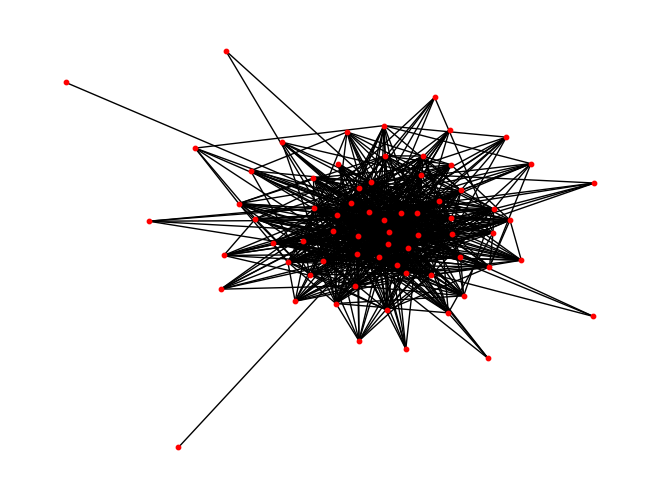

In [17]:
nx.draw(G, with_labels=False, node_color='red',node_size=10)

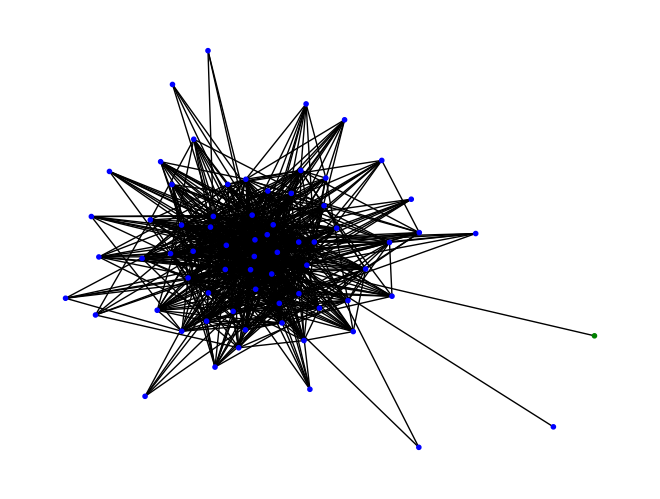

In [18]:
#En este apartado empleamos NetworkX para representar las distintas comunidades de nuestra red
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=False,node_size=9)
plt.show()

**EJERCICIO 2**

Given a network, make a computer program that
calculates its degree distribution (direct and
complementary cumulative), its average nearest
neighbors degree, and its clustering.

**Sección 4**

Empezamos con el cálculo de la $\textit{degree distribution}$, es decir obtener la probabilidad de tener un determinado grado $\textit{k}$, por lo que simplemente contamos cuantos valores de $k_{i}$ tenemos repetidos.
Para ello empezamos obteniendo el valor máximo de $k_{i}$, el que posee un mayor número de conexiones:

El nodo con más conexiones es 159 y tiene 63 conexiones.


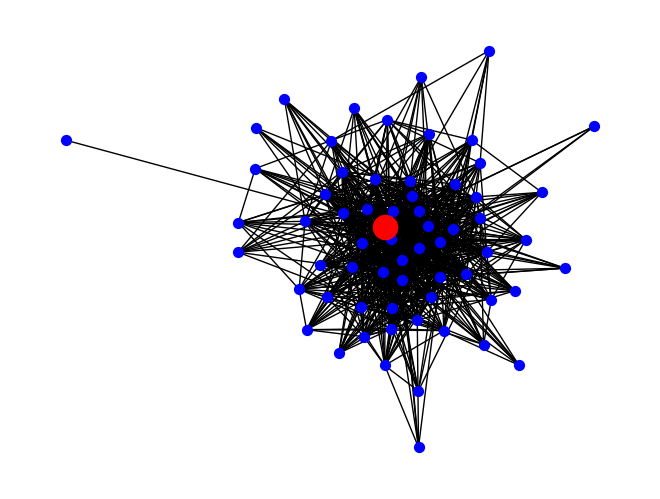

In [19]:
mayor_numero_de_conexiones=max(k)
list1 = k.tolist()
print(f'El nodo con más conexiones es {list1.index(max(k))+1:d} y tiene {int(mayor_numero_de_conexiones):d} conexiones.')

#Representación del Nodo con más conexiones y sus vecinos.
# function to return the main egonet of the largest hub i
seed = 20532
# find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego, seed=seed)  # Seed layout for reproducibility
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

**Sección 5:path lengh**:
En esta sección solo se ha empleado la librería networkX, pues no se pedía la realización del programa

In [20]:
#Saltar porque al estar no conectada da errores
nx.shortest_path_length(G,'6','47')
print(nx.diameter(G))
print(nx.average_shortest_path_length(G))

3
1.6794543904518329


Se puede comparar el resultado al obtenido automaticamente al emplear la función $\textit{hist}$ de python, observando que proporcionan el mismo resultado

**Sección 6**:
En esta sección se representan las degree distribution (direct and
complementary cumulative)

(array([0.58451178, 0.00596441, 0.00596441, 0.00596441, 0.00596441,
       0.01789322, 0.00596441, 0.01192881, 0.01192881, 0.01192881,
       0.01192881, 0.01192881, 0.00596441, 0.01192881, 0.00596441,
       0.01192881, 0.01789322, 0.02982203, 0.01192881, 0.01789322,
       0.00596441, 0.        , 0.00596441, 0.        , 0.02385762,
       0.01192881, 0.        , 0.01192881, 0.00596441, 0.        ,
       0.        , 0.01789322, 0.        , 0.        , 0.00596441,
       0.        , 0.00596441, 0.00596441, 0.00596441, 0.00596441,
       0.01192881, 0.01192881, 0.00596441, 0.00596441, 0.00596441,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00596441, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00596441, 0.        , 0.00596441, 0.        ,
       0.        , 0.00596441]), array([ 0.        ,  1.01612903,  2.03225806,  3.0483871 ,  4.06451613,
        5.08064516,  6.09677419,  7.11290323,  8.12903226,  9.14516129,
       10.16129032

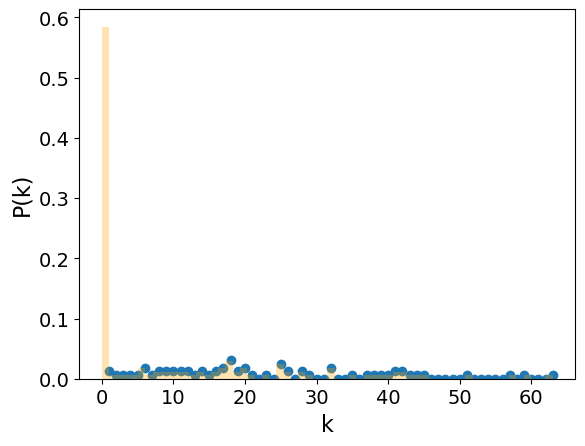

In [21]:
P=np.zeros(int((max(k)))+1)#Matriz donde almacenamos las cuentas
for i in range(int(max(k))+1):#para cada grado
    for j in range(len(k)):#para cada nodo
        if (i==k[j]):#si el nodo tiene el grado buscado sumamos una cuenta
            P[i]+=1
            
#Representación
eje_x=list(range(1,int(max(k))+1))
plt.scatter(eje_x,P[1:]/sum(P))
P_k=plt.hist(k,density=True,bins=int(max(k))-1,alpha=0.3,color='orange')#el histograma debe ser equivalente
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print(P_k)
plt.show()

Sin embargo, es habitual realizar la representación en la escala logarítmica en ambos ejes (log-log), obteniendo:

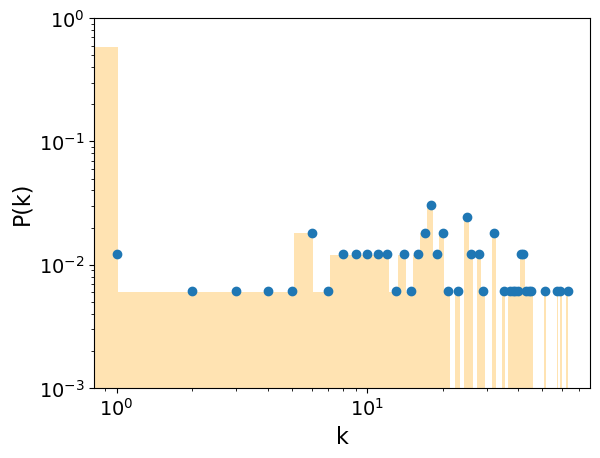

In [22]:
#Representación en escala logarítmica
P_k=plt.hist(k,density=True,bins=int(max(k))-1,color='orange',alpha=0.3)
plt.scatter(eje_x,P[1:]/sum(P))
plt.ylim(0.001,1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Aquí debo realizar el ajuste:
\begin{equation}
P(k)=\frac{\gamma-1}{k_{min}}(\frac{k}{k_{min}})^{-\gamma}
\end{equation}

In [23]:
from scipy.optimize import curve_fit
#realizamos un ajuste para observar si se trata de una ley de potencias 
#obteniendo el valor del parámetro gamma

def func(k, kmin, gamma):
    return (gamma-1)/kmin*(k/kmin)**(-gamma)

ajust=P[2:]/sum(P)
popt, pcov = curve_fit(func,np.array(eje_x[1:]),np.array(ajust),p0=[min(k), 2],maxfev=5000)#2 como valor típico
print('gamma: ',popt[1])
#Representación
plt.hist(k,density=True,bins=int(max(k))-1,alpha=0.3,color='orange')
plt.plot(eje_x, func(eje_x, *popt), 'k--')
plt.scatter(eje_x,P[1:]/sum(P))
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0,0.6)

plt.show()

/tmp/ipykernel_263280/3201720422.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return (gamma-1)/kmin*(k/kmin)**(-gamma)
/tmp/ipykernel_263280/3201720422.py:6: RuntimeWarning: divide by zero encountered in divide
  return (gamma-1)/kmin*(k/kmin)**(-gamma)
/tmp/ipykernel_263280/3201720422.py:6: RuntimeWarning: invalid value encountered in multiply
  return (gamma-1)/kmin*(k/kmin)**(-gamma)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

En la página web de Konect, se propone la siguiente definición para obtener el parámetro $\gamma$ de la ley de potencias

In [24]:
print(1+N*(np.sum(np.log(k/min(k))))**(-1))

nan


/tmp/ipykernel_263280/1229189003.py:1: RuntimeWarning: divide by zero encountered in divide
  print(1+N*(np.sum(np.log(k/min(k))))**(-1))
/tmp/ipykernel_263280/1229189003.py:1: RuntimeWarning: invalid value encountered in divide
  print(1+N*(np.sum(np.log(k/min(k))))**(-1))


A su vez, se puede obtener el primer momento, definido como:
\begin{equation}
\hat{k}=\sum kP(k)
\end{equation}
Valor que debe coincidir con el $<k>$

In [25]:
primer_momento=np.dot(eje_x,P[1:]/sum(P))
print('Primer momento: ',primer_momento)

Primer momento:  9.466666666666665


Y el segundo momento:
    \begin{equation}
\hat{k^{2}}=\sum k^{2}P(k)
\end{equation}

In [26]:
segundo_momento=np.dot(np.array(eje_x)**2,P[1:]/sum(P))#fórmula de los apuntes para la obtención del segundo momento
print('Segundo momento: ',segundo_momento)
print('Segundo momento forma 2: ',np.mean(k**2))

Segundo momento:  305.4666666666667
Segundo momento forma 2:  305.46666666666664


Cumulative degree distribution: the
probability of a node having at most
degree k

64


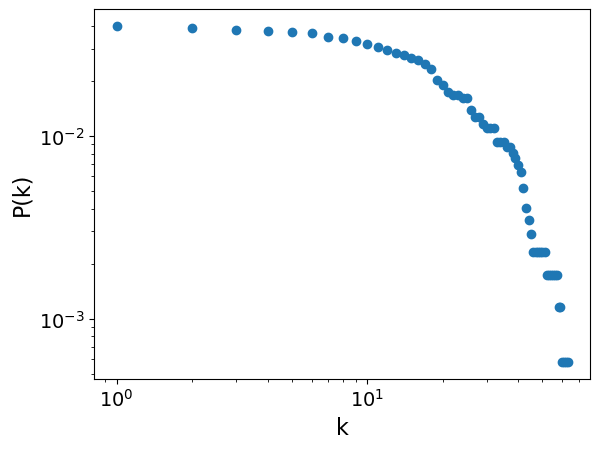

[ 1  2  3  4  5  6  7  9 11 12 13 14 15 16 19 20 22 24 28 29 30 33 35 40
 43 45 46 48 49 51 53 55 57 59 60 63 64 65 66 67 69]
(63, 59, 57, 51, 45, 44, 43, 42, 41, 40, 39, 38, 37, 35, 32, 29, 28, 26, 25, 23, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)


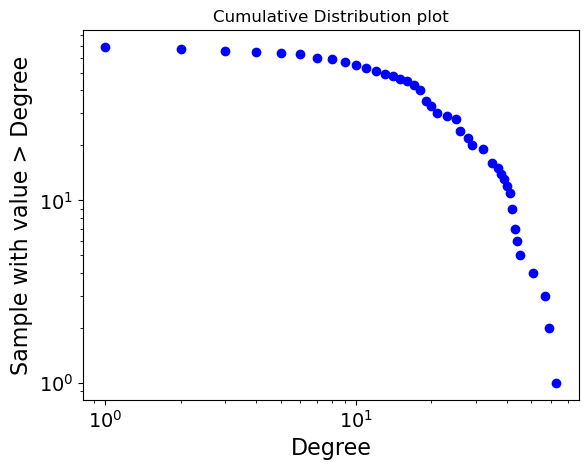

In [27]:
P_cumm=np.zeros(int((max(k)))+1)#Matriz para almacenar las cuentas
for i in range(int(max(k))+1):#Para cada grado 
    for j in range(len(k)):#para cada nodo
        if (i<=k[j]):#si el nodo,tiene grado menor o igual al buscado
            P_cumm[i]+=1#sumamos 1
print(len(P_cumm/N))
#plt.scatter(list(range(1,int(max(k)+1))),P_cumm[1:]/N)
#plt.show()
#Representación
eje_x=list(range(1,int(max(k)+1)))
plt.scatter(eje_x,P_cumm[1:]/sum(P_cumm))
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.show()

#Representación empleando los módulos de la librería NetworkX
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, 'bo')
print(cs)
print(deg)
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree",fontsize=16)
plt.xlabel("Degree",fontsize=16)
plt.show()

Complementary cumulative degree distribution (1-CDF): probability of a node having a degree larger than k

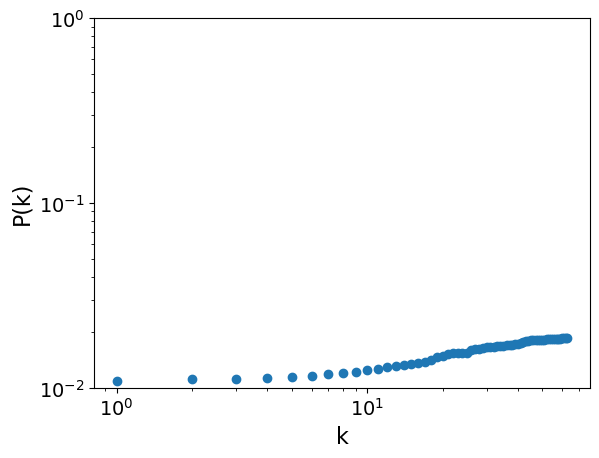

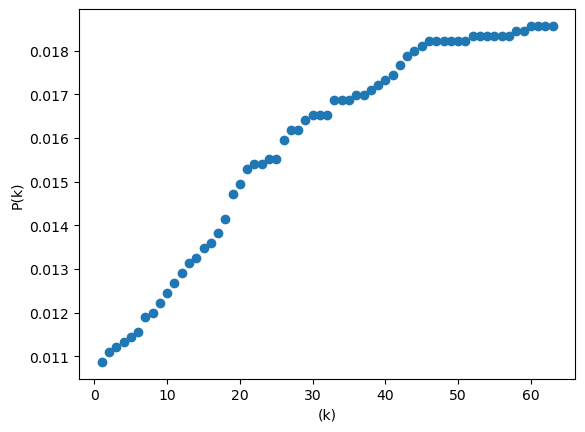

In [28]:
P_cc=np.zeros(int((max(k)))+1)#Matriz para almacenar las cuentas
for i in range(int(max(k))+1):#para cada grado
    for j in range(len(k)):#para cada nodo
        if (i>k[j]):#si el grado del nodo es mayor que el buscado
            P_cc[i]+=1
            
#REPRESENTACION
eje_x=list(range(1,int(max(k))+1))
plt.scatter(eje_x,P_cc[1:]/sum(P_cc))
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01,1)
plt.show()
plt.scatter(eje_x,P_cc[1:]/sum(P_cc))
plt.xlabel('(k)')
plt.ylabel('P(k)')
plt.show()

Ahora procederemos al cálculo del $\textit{Average nearest neighbors degree.}$
El cuál se puede definir como:
\begin{equation}
k_{nn,i}=\frac{1}{|N(i)|}\sum_{j \in N(i)}k_{j}
\end{equation}

In [29]:
#Función para eliminar valores no desados
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

#Función para obtener una lista con el grado de los vecinos de un nodo dado
def obtencion_vecinos(edge_list,N,E):
    Ni=np.zeros((int(N),int(E)))#generamos matriz de vecinos,cada fila es un nodo y cada columna el número de links totales
    for i in range(int(N)):#en cada nodo
        for j in range(int(E)):#buscamos sus links
            if i+1==(edge_list[j,0]):#si esta el nodo
                Ni[i,j]=edge_list[j,1]#metemos al vecino
            elif i+1 == (edge_list[j,1]):#si esta el nodo
                Ni[i,j]=edge_list[j,0]#añadimos al vecino
    return Ni
Ni=obtencion_vecinos(edge_list,N,E)
knn_2=[]
#Obtenemos los grados de los vecinos
for i in range(int(N)):#Para cada nodo
    kj=0#contador, corresponde al de la fórmula
    list1 = Ni[i].tolist()#lo convertimos en una lista para iterar
    list1=remove_values_from_list(list1,0)#eliminamos el valor 0
    for j in (list1):#Para cada vecino de un nodo dado
        try:
            kj=kj+k[int(j)-1]#realizamos el sumatorio, sumando los grados de los nodos vecinos
        except:
            continue
    knn_2.append(kj/k[i])#dividimos por el número de nodos (el grado del nodo de estudio)
print('--------------------------------------------------')
print('--------------------------------------------------')
print('Average nearest neighbour degree (2): ',knn_2)
print('--------------------------------------------------')
print('Average nearest neighbour degree: ', nx.average_neighbor_degree(G))

--------------------------------------------------
--------------------------------------------------
Average nearest neighbour degree (2):  [nan, nan, nan, nan, nan, 49.285714285714285, nan, nan, 43.333333333333336, nan, nan, 26.901960784313726, 31.65625, nan, nan, nan, nan, 33.89473684210526, nan, 34.17857142857143, nan, 31.41176470588235, nan, 33.6875, nan, 36.05, 24.912280701754387, nan, 38.666666666666664, nan, nan, nan, nan, 46.4, 39.0, 40.5, 29.53488372093023, nan, nan, nan, 41.13333333333333, 38.55555555555556, nan, 52.75, 29.51219512195122, nan, 30.15625, nan, nan, 29.853658536585368, nan, 27.904761904761905, nan, nan, nan, 31.457142857142856, 44.125, nan, nan, nan, nan, 28.710526315789473, 34.4, nan, 30.88888888888889, nan, 34.9, 34.84, 28.09090909090909, 38.5, 44.0, 32.357142857142854, nan, 35.333333333333336, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 35.6, nan, 32.724137931034484, nan, nan, nan, 34.32, nan, nan, nan, 39.55555555555556, nan, nan, nan, nan, 30.2972972

/tmp/ipykernel_263280/2265113617.py:27: RuntimeWarning: invalid value encountered in scalar divide
  knn_2.append(kj/k[i])#dividimos por el número de nodos (el grado del nodo de estudio)


Hecho que parece indicar que la expresión correcta es la segunda, representando:

[6.0, 9.0, 12.0, 13.0, 18.0, 20.0, 22.0, 24.0, 26.0, 27.0, 29.0, 35.0, 36.0, 37.0, 41.0, 42.0, 44.0, 45.0, 47.0, 50.0, 52.0, 56.0, 57.0, 62.0, 63.0, 65.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 74.0, 85.0, 87.0, 91.0, 95.0, 100.0, 101.0, 106.0, 109.0, 110.0, 111.0, 112.0, 115.0, 117.0, 124.0, 125.0, 126.0, 128.0, 130.0, 133.0, 134.0, 135.0, 136.0, 138.0, 139.0, 141.0, 145.0, 150.0, 154.0, 157.0, 158.0]
GRADO:  7.0
GRADO:  9.0
GRADO:  51.0
GRADO:  32.0
GRADO:  19.0
GRADO:  28.0
GRADO:  17.0
GRADO:  32.0
GRADO:  20.0
GRADO:  57.0
GRADO:  18.0
GRADO:  18.0
GRADO:  14.0
GRADO:  43.0
GRADO:  15.0
GRADO:  18.0
GRADO:  4.0
GRADO:  41.0
GRADO:  32.0
GRADO:  41.0
GRADO:  42.0
GRADO:  35.0
GRADO:  8.0
GRADO:  38.0
GRADO:  25.0
GRADO:  18.0
GRADO:  20.0
GRADO:  25.0
GRADO:  44.0
GRADO:  16.0
GRADO:  12.0
GRADO:  14.0
GRADO:  12.0
GRADO:  20.0
GRADO:  29.0
GRADO:  25.0
GRADO:  9.0
GRADO:  37.0
GRADO:  26.0
GRADO:  19.0
GRADO:  17.0
GRADO:  10.0
GRADO:  6.0
GRADO:  10.0
GRADO:  6.0
GRADO:  11.0
GRADO:

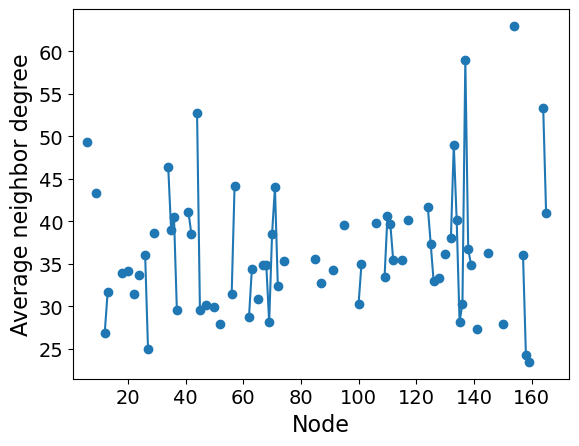

In [30]:
#Representación
eje_x=list(range(1,int((N))+1))
plt.plot(np.array(eje_x),np.array(knn_2),marker='o')
plt.xlim(1)
plt.xlabel('Node',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Average neighbor degree',fontsize=16)
list1 = k.tolist()
print(remove_values_from_list(Ni[list1.index(max(k))],0))
media=[]
#Aquí represento los vecinos del nodo con más links y su promedio
for elemento in remove_values_from_list(Ni[list1.index(max(k))],0):
    print('GRADO: ',k[int(elemento-1)])
    media.append(k[int(elemento-1)])
print('Media vecinos Nodo máximo: ',np.mean(media))

Si representamos k frente a <knni>

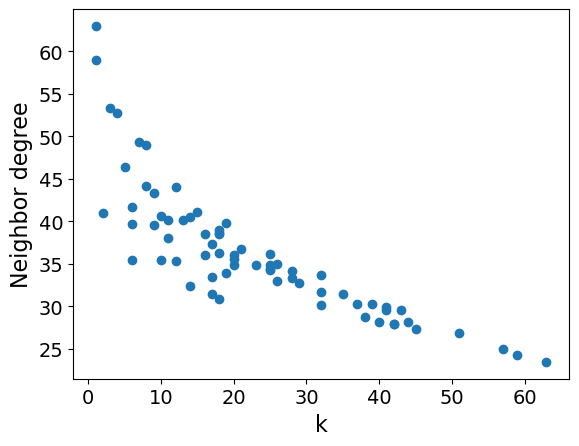

ValueError: x and y must be the same size

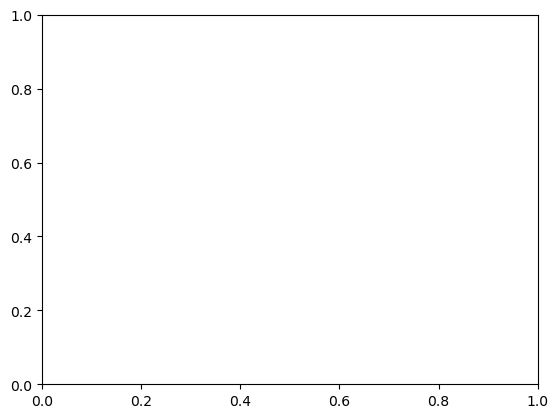

In [31]:
#Funcion para eliminar un valor de una lista
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]
#Realizamos representación en lugar de frente al número de nodos, respecto a k
knn_2_promedio=np.zeros((int(len(k))))
contador=np.zeros((int(len(k))))
k_x=np.zeros((int(len(k))))
#Este bucle es para hacer la media

#sumamos, dentro de cada k, los grados de los vecinos y promediamos
for i in range(len(k)):
    knn_2_promedio[int(k[i])]=knn_2[i]+knn_2_promedio[int(k[i])]
    contador[int(k[i])]=contador[int(k[i])]+1
    k_x[int(k[i])]=k[i]
#Fin del bucle
#Representacion
knn_2_promedio=remove_values_from_list(knn_2_promedio,0)
contador=remove_values_from_list(contador,0)
k_x=remove_values_from_list(k_x,0)
knn_2_promedio=np.array(knn_2_promedio)/np.array(contador)
plt.xlabel('k',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Neighbor degree',fontsize=16)
plt.scatter(k,knn_2)
plt.show()


#Se realiza representación con la media teniendo en cuenta el factor kappa
plt.scatter(k_x,np.array(knn_2_promedio)/(segundo_momento/primer_momento))
plt.xlabel('k',fontsize=16)
plt.ylabel(r'$\bar{k}_{nn}(k)/\kappa$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print('Media knn/kappa: ',np.mean(np.array(knn_2_promedio)/(segundo_momento/primer_momento)))#obtenemos el valor de kappa, a ver si es proximo a 1

#Este kappa mide la hetereogeneidad, no tiene que ver con el anterior, se denominará kappa'
print('Media ¿1?: ',segundo_momento/primer_momento**2)#obtenemos el valor de kappa', a ver si es proximo a 1

plt.show()

plt.scatter(k_x,np.array(knn_2_promedio))
plt.xlabel('k',fontsize=16)
plt.ylabel(r'<knn>(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [41]:
print('ASORTIVIDAD: ',nx.degree_assortativity_coefficient(G))#Valor de NetworKX para saber la tendencia de la red

ASORTIVIDAD:  -0.329912473980683


Si representamos frente al $\textit{Node degree}$

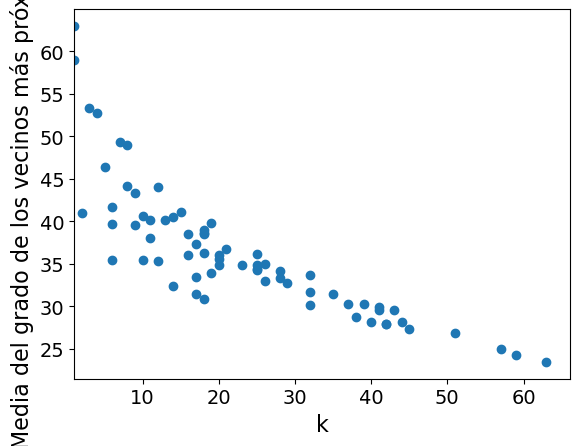

In [42]:
#Otra forma de representarlo, se observa lo mismo que el caso anterior
plt.scatter(np.array(k),np.array(knn_2))
plt.xlim(1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Media del grado de los vecinos más próximos',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.close()

Trabajamos ahora con el clustering
\begin{equation}
c(k)=\frac{1}{N_{k}k(k-1)}\sum 2T_{i}
\end{equation}

In [43]:
#Obtención con NetworkX del Clustering Coeficient
#print('Clustering coefficientes: ',nx.clustering(G))
print('Average clustering coefficientes: ',nx.average_clustering(G))

Average clustering coefficientes:  0.6921032312887545


Con nuestro código:

In [44]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [45]:
#funcion que cuenta apariciones entre dos listas
def cantAparicionesSub(lista1, lista2):
    contador = 0
    lista_final = []
    for n in lista2:#para cada elemento de la lista 2
        num_ocurrencias = lista1.count(n)#contamos las veces que aparece el elemento n en la otra lista
        if num_ocurrencias > 0:#si es mayor que 0
            contador += num_ocurrencias#numero de ocurrencias totales
            lista_final.append(n)
    return contador, lista_final

In [46]:
#Función para contar el número de triangulos
def contar_triangulos(Ni,k):
    T=np.zeros(len(k))#generamos la matriz
    for i in range(len(k)):#bucle en los nodos
        a=(Ni[i].tolist())#los vecinos de cada nodo se almacenan en una lista
        b= [int(x) for x in a]#para cada vecino de la lista lo hacemos entero
        b=remove_values_from_list(b, 0)#eliminamos los ceros
        for elemento in b:#para cada uno de los vecinos del nodo i
            #comprobamos si uno de los vecinos (Nodo j) del Nodo i comparten en común alguna interacción con el vecino Nodo k
                if any(check in Ni[elemento-1] for check in b)==True:
                    #por si esos dos nodos hacen más de un triángulo
                    sumar=cantAparicionesSub(Ni[elemento-1].tolist(),b)
                    T[i]=T[i]+len(sumar[1])#numero total de triángulos
    return T

T=contar_triangulos(Ni,k)              #contamos dos veces por lo que se tendrá en cuenta posteriormente
T=list(T)
print('Numero triangulos: ',np.sum(T)/2)
a=list(nx.triangles(G).values())
print('Numero triángulos: ',np.sum(a))

Numero triangulos:  13515.0
Numero triángulos:  13515


Stars:  24420.0
Clustrering Coefficient Konect: 0.5534398034398035


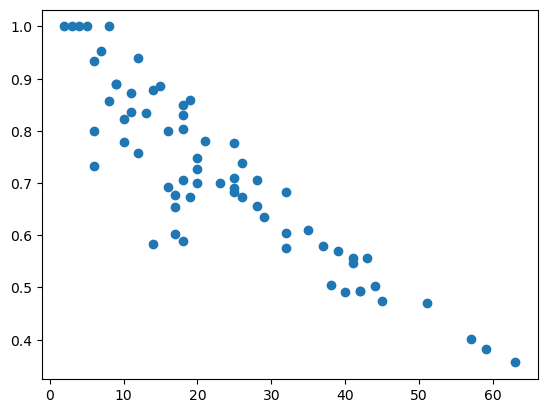

/tmp/ipykernel_234894/3187690615.py:24: RuntimeWarning: invalid value encountered in divide
  plt.scatter(k_x,knn_2_promedio/contador)


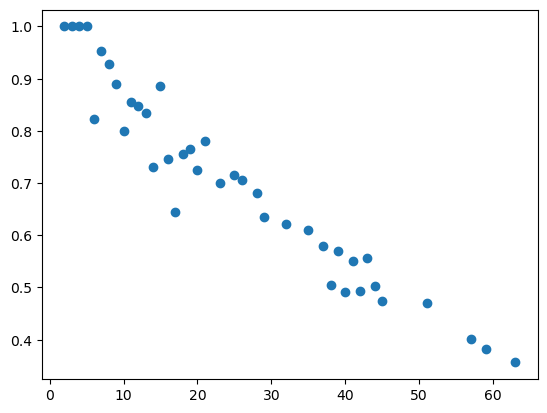

In [47]:
#Valor para el clustering coefficient definido en Konect
t=np.sum(k*(k-1))/2
print('Stars: ',np.sum(k*(k-1))/2)
print('Clustrering Coefficient Konect:',3*np.sum(T)/(3*2*t))
cl=[]
eje=[]
for i in range(len(k)):
    if k[i]>1:
        eje.append(k[i])
        cl.append(3*(T[i])/(3*2*((k[i])*((k[i])-1))/2))
plt.scatter(eje,cl)
plt.show()

#ESTAS DOS REPRESENTACIONES NO SON UTILES, MEJOR LAS DE MÁS ADELANTE
#represnetamos
knn_2_promedio=np.zeros((int(len(eje))))
contador=np.zeros((int(len(eje))))
k_x=np.zeros((int(len(eje))))
for i in range(len(eje)):
    knn_2_promedio[int(eje[i])]=cl[i]+knn_2_promedio[int(eje[i])]
    contador[int(eje[i])]=contador[int(eje[i])]+1
    k_x[int(eje[i])]=eje[i]

plt.scatter(k_x,knn_2_promedio/contador)
plt.show()

In [48]:
from numpy import inf
def clustering_local(k,T):#Definición Locala de Clustering
    c=[]#lista vacia para almacenar datos
    for i in range(len(k)):#para cada nodo
        c.append(1/(k[i]*(k[i]-1))*T[i])#añadimos los valores de la formula para el cluster local
    c = [0 if mp.isnan(x) else x for x in c]#eliminamos los Nan y los cambiamos por 0
    return c

c=clustering_local(k,T)
#eliminamos 0 y nan
c[c == inf] = 0
c=np.nan_to_num(c, posinf=0)
print('c media: ',np.mean(c)*1)
print('Average clustering coefficientes: ',nx.average_clustering(G))
#plt.scatter(k,c)#hacer media en c

c media:  0.2894249876298428
Average clustering coefficientes:  0.6921032312887545


/tmp/ipykernel_234894/3308122291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  c.append(1/(k[i]*(k[i]-1))*T[i])#añadimos los valores de la formula para el cluster local
/tmp/ipykernel_234894/3308122291.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  c.append(1/(k[i]*(k[i]-1))*T[i])#añadimos los valores de la formula para el cluster local


Ploteamos realizando el promedio para cada k:

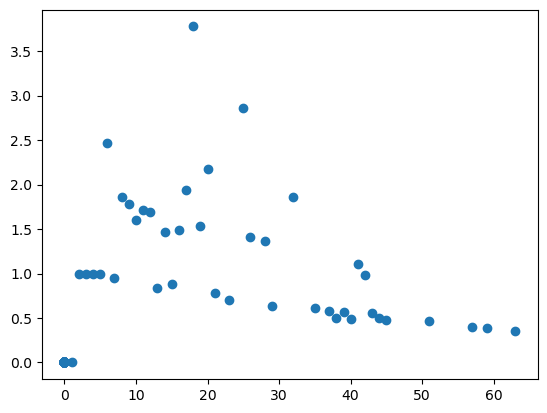

165


/tmp/ipykernel_234894/952091206.py:15: RuntimeWarning: invalid value encountered in divide
  plt.scatter(k_x,np.array(clustering_promedio)/np.array(contador))
/tmp/ipykernel_234894/952091206.py:27: RuntimeWarning: divide by zero encountered in divide
  plt.plot(k_x,1/(k_x-1),ls='--',color='orange')


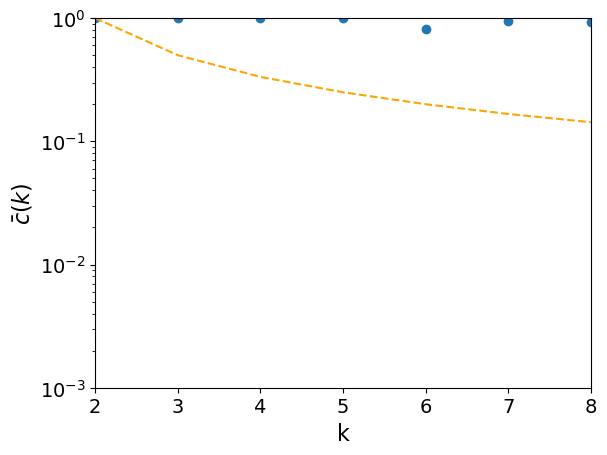

63.0
[1.0, 1.0, 1.0, 1.0, 0.8222222222222223, 0.9523809523809523, 0.9285714285714286, 0.8888888888888888, 0.8, 0.8545454545454545, 0.8484848484848485, 0.8333333333333333, 0.7307692307692308, 0.8857142857142858, 0.7458333333333333, 0.6446078431372549, 0.7555555555555556, 0.7660818713450293, 0.7245614035087719, 0.7809523809523811, 0, 0.6996047430830039, 0, 0.7150000000000001, 0.7061538461538461, 0, 0.6812169312169312, 0.6354679802955665, 0, 0, 0.6216397849462365, 0, 0, 0.6100840336134454, 0, 0.5795795795795796, 0.5049786628733998, 0.5708502024291497, 0.49230769230769234, 0.551219512195122, 0.4924506387921022, 0.5570321151716501, 0.5031712473572939, 0.47373737373737373, 0, 0, 0, 0, 0, 0.46980392156862744, 0, 0, 0, 0, 0, 0.4016290726817042, 0, 0.38281706604324955, 0, 0, 0, 0.3563748079877112]
0.2894249876298429


/tmp/ipykernel_234894/952091206.py:36: RuntimeWarning: invalid value encountered in divide
  clus=np.array(clustering_promedio)/np.array(contador)


In [49]:
clustering_promedio=np.zeros((int(len(k))))
contador=np.zeros((int(len(k))))
k_x=np.zeros((int(len(k))))
#agrupamos los c de un mismo k y promediamos
for i in range(len(k)):
    clustering_promedio[int(k[i])]=c[i]+clustering_promedio[int(k[i])]
    contador[int(k[i])]=contador[int(k[i])]+1
    k_x[int(k[i])]=k[i]

plt.scatter(k_x,np.array(clustering_promedio))
plt.show()


#Representación gráfica con el límite para saber si existe alto clustering o no
plt.scatter(k_x,np.array(clustering_promedio)/np.array(contador))
#plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001,1)
#clustering_promedio=remove_values_from_list(clustering_promedio,0)
#contador=remove_values_from_list(contador,0)
#k_x=remove_values_from_list(k_x,0)
print(len(k_x))
plt.xlim(2,8)
plt.xlabel('k',fontsize=16)
plt.ylabel(r'$\bar{c}(k)$',fontsize=16)
plt.xticks(fontsize=14)
plt.plot(k_x,1/(k_x-1),ls='--',color='orange')

plt.yticks(fontsize=14)
plt.show()



################generamos lista sin infinitos ni ceros
#esto es para calcular  C, teniendo en cuenta las probabilidades
clus=np.array(clustering_promedio)/np.array(contador)
clus = [0 if mp.isnan(x) else x for x in clus]
cluster_coef_list=[]
for u in range(len(clus)):
    if (u)>max(k) or u<2:#eliminamos los c que dan 0, fuera del rango de k, asi como los k<2, pues no pueden formar triangulos
        pass
    else:
        cluster_coef_list.append(clus[u])
#clus=np.nan_to_num(clus, posinf=0)
print((max(k)))
print(cluster_coef_list)
print(np.dot(cluster_coef_list,P[2:]/sum(P)))

**K-core**

Tenemos que, de forma iterativa, eliminar los distintos nodos y enlaces con k<i ,siendo i=1,2...


Por comodidad me creo una funcion para obtener k:

In [50]:
#Esta es una función como la anterior para obtener k, pero añade además el nmero de nodos y links
#Util para poder obtener el K-core
def obtencion_k_e(temporal_edge_list):
    E=len(temporal_edge_list[:,0])
    Ntemp1=max(temporal_edge_list[:,0])
    Ntemp2=max(temporal_edge_list[:,1])
    N=max(Ntemp1,Ntemp2)
    k = np.zeros(int(N))#array mejor que lista porque vamos a ir sumando
    for i in range(int(N)):
        for j in range(int(E)):
            if (i+1 == (temporal_edge_list[j,0]) or i+1 == (temporal_edge_list[j,1])):
                k[i]+=1 
    return k,N,E

In [51]:
archivo='out.subelj_euroroad_euroroad'
archivo='out.hiv'

temporal_edge_list=np.array(np.copy(edge_list))
temporal_k,NODO_TEMP,EDGOS_TEMP=obtencion_k_e(temporal_edge_list)
contador=1#contador para calcular el k-core
for i in range(1,int(max(temporal_k))+1):#contador para cada valo.r del número de grados, el máximo siempre será menor al máximo grado de la red
    g= nx.read_edgelist(archivo,comments='%')#leemos la edge list
    #nx.draw(g, with_labels=True, font_weight='bold')#representamos
    nx.draw(g, with_labels=False, node_color='red',node_size=10)
    plt.show()
    lst = np.array(temporal_k)#creamos array para crear lista del numero de vecinos.
    #encontramos los indices de los elementos donde los grados sean menores al grado que estamos buscando
    result = np.where(lst <= i)
    result=list(result[0])#convertimos a lista
    for j in result:#para cada nodo con grado menor al requerido
        #se elimina de la lista, el y sus links
        fila_delete=np.where(temporal_edge_list==j+1)
        #se actualiza la nueva edge list
        temporal_edge_list=np.delete(temporal_edge_list, fila_delete[0], axis=0)
    if len(temporal_edge_list)>0:#mientras tenga valores, se escribe la nueva edge list
        with open('temp.dat','w') as files:
            for linea in range(len(temporal_edge_list)):
                files.write(str(temporal_edge_list[linea,0])+' '+ str(temporal_edge_list[linea,1])+"\n")
        files.close()
        archivo='temp.dat'
    #Actualizamos
    try:
        temporal_k,NODO_TEMP,EDGOS_TEMP=obtencion_k_e(temporal_edge_list)
    except:
        break
    contador=contador+1
    print('K-CORE: ',contador-1)

print('Grado: ',contador-1)

#Valor de la librería NetworkX, por algun motivo no da valor
print('Grado librería: ',nx.k_core(G))

FileNotFoundError: [Errno 2] No such file or directory: 'out.hiv'

**Tarea 4:** De aquí podemos saltar a la tarea 5, donde empieza el CM
Erdos Random-Graph

Existen links entre cualquier par de nodos con probabilidad p, G(N,p) representa en mecacnica estadistica el ensamble canonico. Donde se fija el número de links promedio:
\begin{equation}
<E>=1/2*N(N-1)p
\end{equation}
En el límite:
\begin{equation}
    \lim_{N \to \infty}(pN^{2})=\infty
\end{equation}
    Donde las fluctuaciones sobre el promedio desapareceen para sistemas muy grandes

In [175]:
nodos = 1000
probabilidad = 0.1
g = nx.erdos_renyi_graph(nodos, probabilidad)
k_=sum(dict(g.degree()).values())/float(len(g))
#Aqui empleo NetworKx por ser mas rapida y calcular si es igual k+1 que k**2/k
##################################################
kk__=[]
for key1 in dict(g.degree()).values():
        kk__.append(key1*key1)
####################################################
kk_=sum(kk__)/float(len(kk__))
print('k+1',k_+1)
print(r'\<k^{2}>/<k>',kk_/k_)

k+1 100.228
\<k^{2}>/<k> 100.1628975692345


In [152]:
from itertools import combinations
from random import random
def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):#Combinaciones entre los nodos
        a = random()
        if a < p:#si es más pequeño que un determinado límite lo aceptamos el enlace
            E.add(combination)
    with open('ERDOS.dat','w') as files:
        for linea in range(len(list(E))):
            files.write(str(list(E)[linea][0]+1)+' '+ str(list(E)[linea][1]+1)+"\n")
    files.close()
    manual=np.loadtxt('ERDOS.dat')
    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)
    return g,manual
directa,manual=ER(nodos,probabilidad)

In [103]:
print('Average clustering coefficientes: ',nx.average_clustering(directa))

Average clustering coefficientes:  0.49929186319141633


Creamos una función para el cálculo de knn

In [44]:
#Esta es una función, explicada anteriormente pero ahora compacta para obtener todas las funciones
#Es decir, calcula todo lo proporcionado en el ejercicio anterior, pues me ha parecido útil, no lo explico por ser un
#copy paste
def obtencion_knn(edge_list):
    k,N,E=obtencion_k_e(edge_list)
    Ni=np.zeros((int(N),int(E)))
    for i in range(int(N)):
        for j in range(int(E)):
            if i+1==(edge_list[j,0]):
                Ni[i,j]=edge_list[j,1]
            elif i+1 == (edge_list[j,1]):
                Ni[i,j]=edge_list[j,0]
    knn_2=[]
    for i in range(int(N)):
        kj=0
        list1 = Ni[i].tolist()
        for j in range(len(k)):
            try:
                list1.index(j+1)
                kj=kj+k[j]
            except:
                continue
        knn_2.append(kj/k[i])  
    
    knn_2_promedio=np.zeros((int(len(k))))
    contador=np.zeros((int(len(k))))
    k_x=np.zeros((int(len(k))))
    #Este bucle es para hacer la media
    #sumamos, dentro de cada k, los grados de los vecinos y promediamos
    for i in range(len(k)):
        knn_2_promedio[int(k[i])]=knn_2[i]+knn_2_promedio[int(k[i])]
        contador[int(k[i])]=contador[int(k[i])]+1
        k_x[int(k[i])]=k[i]
    #Fin del bucle
    knn_2_promedio=remove_values_from_list(knn_2_promedio,0)
    contador=remove_values_from_list(contador,0)
    k_x=remove_values_from_list(k_x,0)
    knn_2_promedio=np.array(knn_2_promedio)/np.array(contador)
    kappa=np.mean(k**2)/np.mean(k)
    ################
    ###TRIANGULOS###
    ################
    T=contar_triangulos(Ni,k)              #contamos dos veces por lo que se tendrá en cuenta posteriormente
    T=list(T)
    ################
    ###CLUSTERING###
    ################
    c=clustering_local(k,T)
    c[c == inf] = 0
    c=np.nan_to_num(c, posinf=0)
    
    clustering_promedio=np.zeros((int(len(k))))
    contador=np.zeros((int(len(k))))
    k_xx=np.zeros((int(len(k))))
    for i in range(len(k)):
        clustering_promedio[int(k[i])]=c[i]+clustering_promedio[int(k[i])]
        contador[int(k[i])]=contador[int(k[i])]+1
        k_xx[int(k[i])]=k[i]
    c_p=np.array(clustering_promedio)/np.array(contador)
    ############################
    #########ACUMULADAS#########
    ############################
    eje_x_acumulada=list(range(1,int(max(k))+1))
    P=np.zeros(int((max(k)))+1)#Matriz donde almacenamos las cuentas
    P_cumm=np.zeros(int((max(k)))+1)#Matriz para almacenar las cuentas
    P_cc=np.zeros(int((max(k)))+1)#Matriz para almacenar las cuentas
    for i in range(int(max(k))+1):#para cada grado
        for j in range(len(k)):#para cada nodo
            if (i==k[j]):#si el nodo tiene el grado buscado sumamos una cuenta
                P[i]+=1
            elif (i<=k[j]):
                P_cumm[i]+=1
            elif (i>k[j]):#si el grado del nodo es menor que el buscado
                P_cc[i]+=1
    P_1=P[1:]/sum(P)
    P_2=P_cumm[1:]/sum(P_cumm)
    P_3=P_cc[1:]/sum(P_cc)
    return knn_2,k,N,E,Ni,knn_2_promedio,k_x,kappa,c_p,k_xx,eje_x_acumulada,P_1,P_2,P_3,c,T

<ipython-input-36-04d2830c1efb>:7: RuntimeWarning: divide by zero encountered in double_scalars
  c.append(1/(k[i]*(k[i]-1))*T[i])
<ipython-input-36-04d2830c1efb>:7: RuntimeWarning: invalid value encountered in double_scalars
  c.append(1/(k[i]*(k[i]-1))*T[i])
<ipython-input-59-025e3c1da237>:57: RuntimeWarning: invalid value encountered in true_divide
  c_p=np.array(clustering_promedio)/np.array(contador)


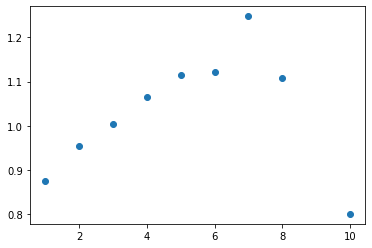

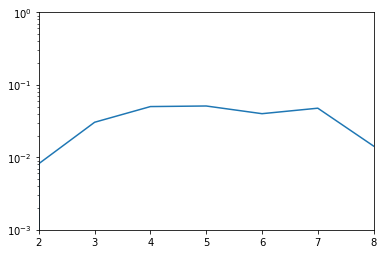

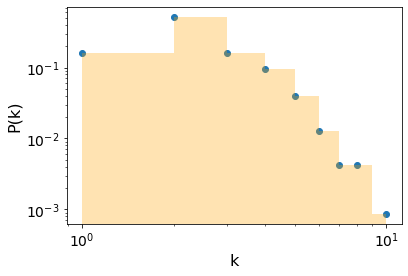

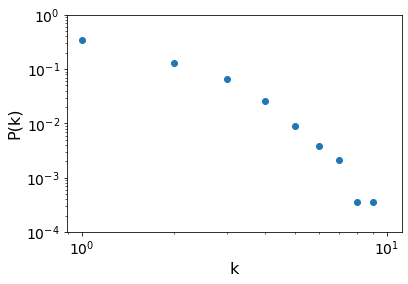

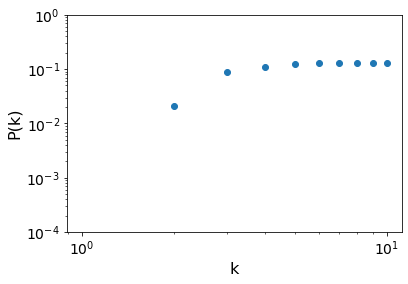

In [60]:
#PRUEBAS_BORRAR
#Estas son unas pruebas para observar que proporciona lo mismo que en el caso anterior
archivo='out.subelj_euroroad_euroroad'
edge_list=np.loadtxt(archivo,comments='%')
knn_2,k,N,E,Ni,knn_2_promedio,kx,kappa,cluster,k_xx,eje_x_acumulada,P_1,P_2,P_3,c,T=obtencion_knn(edge_list)
plt.scatter(kx,np.array(knn_2_promedio)/kappa)
plt.show()
plt.plot(k_xx,cluster)
plt.yscale('log')
plt.ylim(0.001,1)
plt.xlim(2,8)
plt.show()
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.scatter(eje_x_acumulada,P_1)
P_k=plt.hist(k,density=True,bins=int(max(k))-1,color='orange',alpha=0.3)
plt.show()
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.scatter(eje_x_acumulada,P_2)
plt.ylim(0.0001,1)
plt.show()
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.scatter(eje_x_acumulada,P_3)
plt.ylim(0.0001,1)
plt.show()
#####################################################

Este bloque mejor saltarlo porque cálculo absolutamente todo y no se encuentra optimizado

In [104]:
'''
ERDOS_Knn,Erdos_k,Erdos_N,Erdos_E,Erdos_Ni,ERDOS_knn_2_promedio,ERDOS_k_x,ERDOS_kappa,ERDOS_c_p,ERDOS_k_xx,ERDOS_eje_x_acumulada,ERDOS_P_1,ERDOS_P_2,ERDOS_P_3,ERDOS_c,ERDOS_ERDOS_T=obtencion_knn(manual)
print('Average degree (<k>): ', np.mean(Erdos_k))
print('Average degree',2*directa.number_of_edges()/directa.number_of_nodes())
print('--------------------------------------------------')'''

"\nERDOS_Knn,Erdos_k,Erdos_N,Erdos_E,Erdos_Ni,ERDOS_knn_2_promedio,ERDOS_k_x,ERDOS_kappa,ERDOS_c_p,ERDOS_k_xx,ERDOS_eje_x_acumulada,ERDOS_P_1,ERDOS_P_2,ERDOS_P_3,ERDOS_c,ERDOS_ERDOS_T=obtencion_knn(manual)\nprint('Average degree (<k>): ', np.mean(Erdos_k))\nprint('Average degree',2*directa.number_of_edges()/directa.number_of_nodes())\nprint('--------------------------------------------------')"

En esta distribución el average degree debe valer:
    \begin{equation}
    <k>=p(N-1)
    \end{equation}

In [105]:
print('<k>: ',probabilidad*(nodos-1))

<k>:  249.5


En el regimen disperso se obtiene:
    \begin{equation}
    p=\frac{<k>}{N}
    \end{equation}
    Con valor de average degree constante, transformandose así en una distribución de Poisson:
        \begin{equation}
        P(k)=\frac{1}{k!}<k>^{k}e^{-<k>}
        \end{equation}
    Donde no existen correlaciones degree-degree:
    \begin{equation}
    knn(k)=<k>-1
    \end{equation}
    
 El clustering coefficient:
    
   \begin{equation}
    c=\frac{<k>}{N}
    \end{equation}
    
Hecho que implica una locally tree-like

In [ ]:
primer_momento=np.mean(Erdos_k)
segundo_momento=np.mean(Erdos_k**2)
print('<k>+1: ',np.mean(Erdos_k)+1)
print('<k**2>/<k>: ',np.mean(Erdos_k**2)/np.mean(Erdos_k))
print('<k>**2-<k>/<k>= ',(np.mean(Erdos_k)**2+np.mean(Erdos_k))/(np.mean(Erdos_k)))
print('Density: ', Erdos_E/(Erdos_N*(Erdos_N-1)/2))
print('Número total de links sin eliminar repetidos: ',Erdos_E)
print('Links: ',probabilidad*(Erdos_N-1)*Erdos_N/2)
#manual=eliminar_repetidas(manual)

In [ ]:
#Representacion
print(Erdos_N)
plt.plot(ERDOS_Knn,color='red')
plt.scatter(nx.average_neighbor_degree(directa).keys(),nx.average_neighbor_degree(directa).values())
y=np.linspace(np.mean(Erdos_k)+1,np.mean(Erdos_k)+1,100)
x=np.linspace(0,10000,100)
plt.plot(x,y,color='k')
plt.xlabel('Nodes',fontsize=16)
plt.ylabel(r'knn',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,nodos)

In [ ]:

knn_2_promedio=np.zeros((int(Erdos_N)))
contador=np.zeros((int(Erdos_N)))
k_x=np.zeros((int(Erdos_N)))
for i in range(int(Erdos_N)):
    knn_2_promedio[int(Erdos_k[i])]=ERDOS_Knn[i]+knn_2_promedio[int(Erdos_k[i])]
    contador[int(Erdos_k[i])]=contador[int(Erdos_k[i])]+1
    k_x[int(Erdos_k[i])]=Erdos_k[i]



knn_2_promedio=remove_values_from_list(knn_2_promedio,0)
contador=remove_values_from_list(contador,0)
k_x=remove_values_from_list(k_x,0)

knn_2_promedio=np.array(knn_2_promedio)/np.array(contador)
plt.xlabel('k',fontsize=16)
plt.ylabel('Average neighbor degree',fontsize=16)
plt.plot(x,y,color='k')
plt.xlim(210,290)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel('Average neighbor degree',fontsize=16)
plt.scatter(Erdos_k,ERDOS_Knn)
plt.show()

plt.scatter(k_x,np.array(knn_2_promedio)/(segundo_momento/primer_momento))
plt.xlabel('k',fontsize=16)
plt.ylabel(r'<knn>(k)/$\kappa$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.plot(x,y,color='k')

#plt.xscale('log')
plt.yscale('log')

La degree distribution en este modelo debe presenta la forma de una distribución bimodal tal que:
\begin{equation}
P(k)=\begin{pmatrix}
N-1 \\
k \\
\end{pmatrix}p^{k}(1-p)^{N-1-k} 
\end{equation}

In [ ]:
P_erd=np.zeros(int((max(Erdos_k)))+1)
for i in range(int(max(Erdos_k))+1):
    for j in range(len(Erdos_k)):
        if (i==Erdos_k[j]):
            P_erd[i]+=1
eje_x=list(range(1,int(max(Erdos_k))+1))
plt.scatter(eje_x,P_erd[1:]/sum(P_erd))
P_k_erd=plt.hist(Erdos_k,density=True,bins=int(max(Erdos_k))-1-int(min(Erdos_k)),color='orange',alpha=0.3)#-int(max(Erdos_k))-1,color='orange')
plt.xlabel('k',fontsize=16)
plt.ylabel('P(k)',fontsize=16)
plt.xlim(int(min(Erdos_k))-1,int(max(Erdos_k))+1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
import scipy.special
P_ERDOS=[]
for i in range(nodos):
    P_ERDOS.append(scipy.special.binom(nodos-1,Erdos_k[i])*probabilidad**Erdos_k[i]*(1-probabilidad)**(nodos-1-Erdos_k[i]))
plt.scatter(Erdos_k,P_ERDOS,color='k',label='Theoretical')
plt.legend(fontsize='16')


**Assigment 4 (OPTIONAL):**
Reproduce the SW figure

Dibujos clase

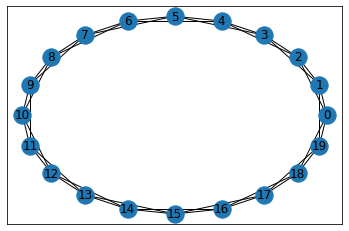

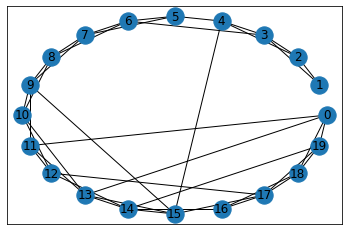

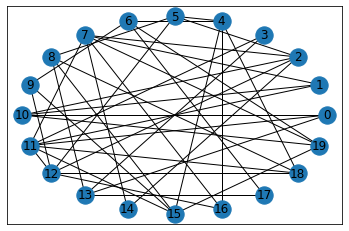

In [51]:
C=[]
P=[]
L=[]
p=0
#lista de valores para cada probabilidad
while p<=1:#mientras la p no se 1
    G = nx.watts_strogatz_graph(n = 20,k=4, p = p)#generamos sw model
    #Estos 3 son para representar
    if p==0 or p==0.2 or p==1:
        pos = nx.circular_layout(G)
        nx.draw_networkx(G, pos)
        plt.show()
    #Fin representacion
    
    k_SW1=np.array((list(G.degree())))[:,1]
    C.append(nx.average_clustering(G))#Obtencion del clustering coefficient
    L.append(nx.average_shortest_path_length(G))#obtencion del average shortest path length
    P.append(p)
    #ir añadiendo distintos valores de probabilidad en el bucle
    if p==0.0001 or p==0.001:
        p=p*10
    elif p==0:
        p=p+0.0001
    else:
        p=p+0.01
    p=round(p, 4)

**Representación assignment 4:**
Reproduce the SW figure

Text(0.5, 0, 'Probability')

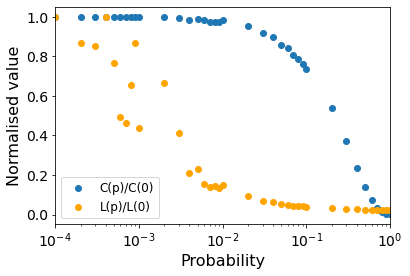

In [47]:
#Representación SW Model
plt.scatter(P,np.array(C)/C[0],label='C(p)/C(0)')
plt.scatter(P,np.array(L)/L[0],color='orange',label='L(p)/L(0)')
plt.xscale('log')
plt.xlim(0.0001,1)
plt.legend(fontsize=12)
plt.ylabel('Normalised value',fontsize=16)
#plt.plot(x,y,color='k')
#plt.xlim(210,290)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Probability',fontsize=16)


##########################################################################################################
##########################################################################################################
##########################################################################################################

# Tarea 5: **Assigment 5: Configuration Model**

Given a list of degrees, make a computer program that
generates CM (configuration model) random networks with the given degrees

##########################################################################################################
##########################################################################################################
##########################################################################################################

Estos modelos estudiados hasta ahora pertenecen a los modelos de redes en equilibrio, donde el número de nodos es fijo.

Con el módulo de Python:

El modelo de configuración suele utilizarse como modelo nulo para las redes complejas reales. Produce redes máximamente aleatorias con una secuencia de grados preasignada (no correlacionada excepto por las correlaciones estructurales inevitables necesarias para cerrar las redes)
Nuestro código:

Se ha elegido el Configuration Model puro frente al rewiring, por el motivo de que es interesante para el usuario en proyectos futuros, de cualquier forma la filosofia es la misma

In [41]:
#En esta sección comprobamos que el numero de links sea par, pues sino nunca podra cerrarse
print('cuerdas de cada nodo',k)
print('numero de nodos',N,len(k))
print('Par?',np.sum(k))
def stubs_par(k):
    if np.sum(k)%2==0:
        print('Son pares, adelante')
        pass
    else:
        print('Stubs impar, añadir una')#de no ser par añadimos un link al ultimo nodo
        k[-1]=k[-1]+1
    return k
funcion=stubs_par(k)
cuerdas_de_cada_nodo=[]

for elemento in k:
    cuerdas_de_cada_nodo.append(int(elemento))

cuerdas de cada nodo [1. 3. 2. ... 1. 1. 1.]
numero de nodos 1174.0 1174
Par? 2834.0
Son pares, adelante


In [42]:
#Importamos numeros aleatorios enteros que se empleará para seleccionar el número de cuerdas, no de nodos!!!
from random import randint


# Pieza fundamental del CM

In [43]:
def generacion_cm(k,N):#proporcioanmos solo el número de nodos y los grados de cada nodo, de hecho solo sería
#necesario k, porque len(k)=N
    with open('Configuration_Model.dat','w') as files:#Lo escribimos en formato edge_list
        def init_Cuerdas(nodo, num):#iniciamos las cuerdas donde identificamos cada nodo y su numero de cuerdas
            c = []
            for i in range(0,num):
                c.append(Cuerda(i,nodo, None))#creamos una especie de direccionario con nodo y sus cuerdas
            return c

        class Nodo:#cremaos un identificador de cada nodo
            def __init__(self, id, numero_cuerdas):#su id, y su numedor de cuerdas
                self.id = id
                self.cuerdas = init_Cuerdas(id, numero_cuerdas)

        class Cuerda:#ahora identificamos cada cuerda, (es decir el número de cuerdas totales)
            def __init__(self, id, nodo, cuerda):#le proporcionamos un id, y a que nodo pertenecen
                self.id = id
                self.nodo = nodo
                #esto nos permite saber si la cuerda ha sido empleada o esta libre para forma un enlace
                self.enlace = cuerda
            
            #esta función simplemente es para escribir si se forma un enlace en el formato edge list
            def to_string(self):
                if self.enlace != None:
                   # print(str(self.nodo)+" - "+str(self.enlace.nodo))
                    a=self.nodo+1;b=self.enlace.nodo+1
                    files.write(str(a)+' '+ str(b)+"\n")

                else:
                    #print(str(a)+" - ")
                    files.write(str(self.nodo)+"\n")
                    
#una vez obtenidas las clases, que ha funciones practicas es como diccionarios, empleamos las distintas funciones
#necesrias para generar el configuration model.
        def lista_de_Cuerdas():#generamos la lista de con las cuerdas y sus caracteristicas
            lista = []#lista de almacenaje
            for nodo in nodos:#para cada nodo dentro de los nodos
                for cuerda in nodo.cuerdas:#y para cada cuerda dentro de las que tiene la clase nodo
                    lista.append(cuerda)#proporcionamos la lista de cuerdas
            return lista

        def list_to_Nodos(lista):#la lista de nodos
            nodos = []#lista de almacenaje
            #miramos en cada nodo las cuerdas que tiene
            for i in range(0, len(cuerdas_de_cada_nodo)):#para cada cuerda por indice dentro de cada nodo
                nodos.append(Nodo(i,cuerdas_de_cada_nodo[i]))#añadimos las cuerdas de cada uno de los nodos y su identificador
            return nodos

        def faltan_cuerdas_por_enlazar():#observamos si existen cuerdas sin enlazar
            for cuerda in cuerdas:#se observa si tienen algun enlace
                if cuerda.enlace == None:#si ya estan enlazadas no se consideran
                    return True
            return False

        def hay_cuerdas_para_enlazar(i):#buscamos las cuerdas que quedan por enlazar
            for i in range(i+1,len(nodos)):#buscamos en nuestros nodos
                for cuerda in nodos[i].cuerdas:#y en cada nodo sus cuetdas
                    if cuerda.enlace == None:#si estan enlazadas o no tomamos una decisión
                        return True
            return False
        
        def nodos_enlazados(n1, n2):#miramos si dos nodos están previamente enlazados
            nodo1 = nodos[n1]#para evitar self-loops

            for cuerda in nodo1.cuerdas:#observamos las cuerdas de un nodo dado
                if cuerda.enlace != None and cuerda.enlace.nodo == n2:#y observamos si esta previamente enlazado
                    return True#con el nodo 2
            return False

        nodos = list_to_Nodos(cuerdas_de_cada_nodo)
        cuerdas = lista_de_Cuerdas()
        #generamos un bucle por si acaso se llega a un absurdo, el ultimo nodo no se puede enlazar con otro por 
        #que ya tiene un enlace ...
        while (True):

            for cuerda in cuerdas:#miramos que las cuerdas no tengan un enlace ya hecho para no eliminarlo
                if cuerda.enlace != None:
                    continue

                while True:#miramos que no queden cuerdas sin enlazar, pues si ya estan se ha acabado el bucle
                    if not hay_cuerdas_para_enlazar(cuerda.nodo):
                        break
                    #el punto clave, para cada cuerda buscamos otra al azar, otra cuerda y no otro nodo!!!!!!!
                    cuerda_enlazar = cuerdas[randint(cuerda.id, len(cuerdas)-1)]
                    if (cuerda_enlazar.enlace != None or#si no estan previamente enlazadas 
                        cuerda.nodo == cuerda_enlazar.nodo or#generamos elenlace
                        nodos_enlazados(cuerda.nodo, cuerda_enlazar.nodo)):
                        continue
                    #indicamos a las dos cuerdas que estan enlazadas y con quien
                    cuerda.enlace = cuerda_enlazar
                    cuerda_enlazar.enlace = cuerda
                    break

            if faltan_cuerdas_por_enlazar():#si quedan cuerdas por enlazar
                for cuerda in cuerdas:#igual toca volver a empezar por lo que borramos todo y de nuvo
                    cuerda.enlace = None
            else:
                break

        for cuerda in cuerdas:  
            (cuerda.to_string())
    return
#generamos el cm
generar_cm=generacion_cm(cuerdas_de_cada_nodo,N)

In [44]:
kantiguo=np.copy(k)#copiamos la degree distribution
#abrimos el archivo y calculamos distintas propiedades
archivo='Configuration_Model.dat'
edge_list=np.loadtxt(archivo,comments='%')
E=len(edge_list[:,0])
print('E antes',E)
#por construccion los enlaces aparecen como 1 3, 3 1, por lo que se deben eliminar los repetidos
edge_list=eliminar_repetidas(edge_list,True)
E=len(edge_list[:,0])
print('E',E)
#comprobamos que la degree distribution es igual a la dada
k_nuevo=obtencion_k(edge_list,N,E)
if(set(kantiguo) == set(k_nuevo)):
    print("Lists are equal")
else:
    print("Lists are not equal")

E antes 2834
E 1417
Lists are equal


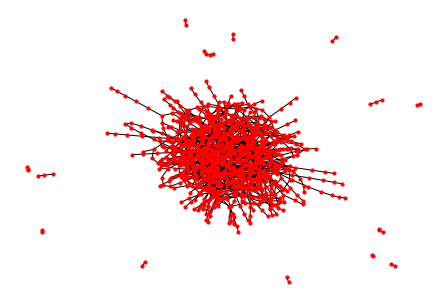

In [45]:
#pintamos el configuration model
G = nx.read_edgelist(archivo, comments='%')
nx.draw(G, with_labels=False, node_color='red',node_size=10)

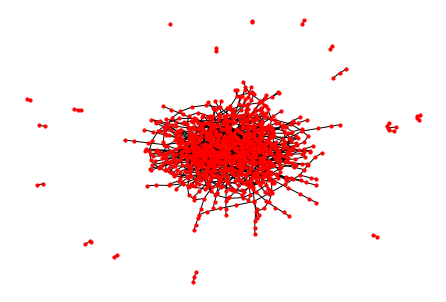

In [46]:
#NetworkX, generacion del cm con NetworkX
cm=nx.configuration_model(cuerdas_de_cada_nodo)
cm = nx.Graph(cm)
nx.draw(cm, with_labels=False, node_color='red',node_size=10)

In [47]:
#PARA ESCRIBIRLO BIEN
with open('Configuration_Model_2.dat','w') as files:
    for fila in range(len(edge_list[:,0])):
        files.write(str(int(edge_list[fila,0]))+' '+ str(int(edge_list[fila,1]))+"\n")

In [48]:
#listas vacias para almacenar resultados y hacer estadística
clustering_iteraccion=[]
triangulos_iteraccion=[]
ejex_knn=[]
knn_array=[]
cluster_representacion=[]
eje_cluster_reptesentacion=[]

prob_1=[]
prob_2=[]
prob_3=[]
p_x=[]
#generamos el configuration model unas 150 veces
for i in range(150):
    print('Iteracción: ',i)
    generar_cm=generacion_cm(cuerdas_de_cada_nodo,N)#crear cm
    kantiguo=np.copy(k)
    archivo='Configuration_Model.dat'
    edge_list=np.loadtxt(archivo,comments='%')
    edge_list=eliminar_repetidas(edge_list,True)#eliminar repetidos
    #llamamos a la increible funcion que nos calcula distintas propiedades de la red
    knn_2,k,N,E,Ni,knn_2_promedio,kx,kappa,cluster,k_xx,eje_x_acumulada,P_1,P_2,P_3,c,T=obtencion_knn(edge_list)
    #limapiamos un poco los resultados para obtener de la lista los valores para promediar
    triangulos_iteraccion.append(np.sum(T)/2)
    clustering_iteraccion.append(np.mean(c)*1)
    ejex_knn.append(kx)
    knn_array.append(np.array(knn_2_promedio)/kappa)
    cluster_representacion.append(cluster)
    eje_cluster_reptesentacion.append(k_xx)
    
    p_x.append(eje_x_acumulada);prob_1.append(P_1);prob_2.append(P_2);prob_3.append(P_3)
    
#valores promedio de interés y su incertidumbre
print('Media clustering: ',np.mean(clustering_iteraccion))
print('std: ',np.std(clustering_iteraccion)/np.sqrt(len(clustering_iteraccion)))

print('Media triángulos: ',np.mean(triangulos_iteraccion))
print('std: ',np.std(triangulos_iteraccion)/np.sqrt(len(triangulos_iteraccion)))


Iteracción:  0


<ipython-input-36-04d2830c1efb>:7: RuntimeWarning: divide by zero encountered in double_scalars
  c.append(1/(k[i]*(k[i]-1))*T[i])
<ipython-input-36-04d2830c1efb>:7: RuntimeWarning: invalid value encountered in double_scalars
  c.append(1/(k[i]*(k[i]-1))*T[i])
<ipython-input-40-025e3c1da237>:57: RuntimeWarning: invalid value encountered in true_divide
  c_p=np.array(clustering_promedio)/np.array(contador)


Iteracción:  1
Iteracción:  2
Iteracción:  3
Iteracción:  4
Iteracción:  5
Iteracción:  6
Iteracción:  7
Iteracción:  8
Iteracción:  9
Iteracción:  10
Iteracción:  11
Iteracción:  12
Iteracción:  13
Iteracción:  14
Iteracción:  15
Iteracción:  16
Iteracción:  17
Iteracción:  18
Iteracción:  19
Iteracción:  20
Iteracción:  21
Iteracción:  22
Iteracción:  23
Iteracción:  24
Iteracción:  25
Iteracción:  26
Iteracción:  27
Iteracción:  28
Iteracción:  29
Iteracción:  30
Iteracción:  31
Iteracción:  32
Iteracción:  33
Iteracción:  34
Iteracción:  35
Iteracción:  36
Iteracción:  37
Iteracción:  38
Iteracción:  39
Iteracción:  40
Iteracción:  41
Iteracción:  42
Iteracción:  43
Iteracción:  44
Iteracción:  45
Iteracción:  46
Iteracción:  47
Iteracción:  48
Iteracción:  49
Iteracción:  50
Iteracción:  51
Iteracción:  52
Iteracción:  53
Iteracción:  54
Iteracción:  55
Iteracción:  56
Iteracción:  57
Iteracción:  58
Iteracción:  59
Iteracción:  60
Iteracción:  61
Iteracción:  62
Iteracción:  63
I

10


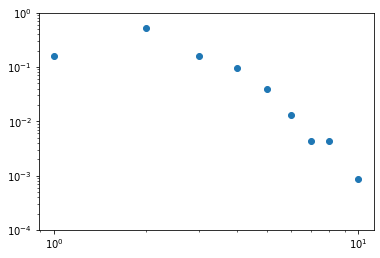

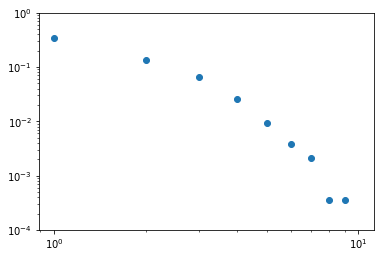

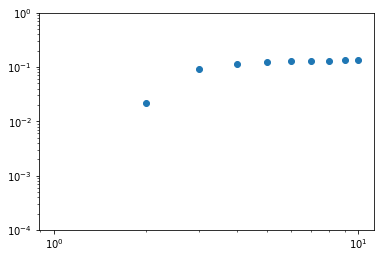

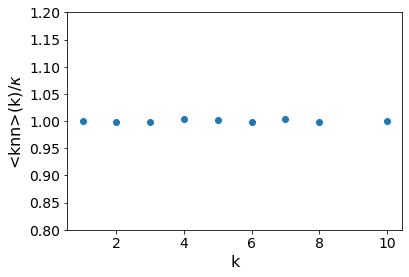

(0.0012, 0.0018)

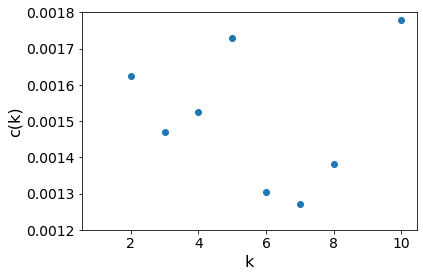

In [55]:
print(len(prob_1[0]))
#ABSURDOS 
#representaciones que depende de la degree distribution por lo que no van a cambiar
p_1=np.mean(prob_1,axis=0)
p_2=np.mean(prob_2,axis=0)
p_3=np.mean(prob_3,axis=0)
axis_x=np.mean(p_x,axis=0)


plt.scatter(axis_x,p_1)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001,1)
plt.show()



plt.scatter(axis_x,p_2)
plt.xscale('log')
plt.ylim(0.0001,1)

plt.yscale('log')
plt.show()


plt.scatter(axis_x,p_3)
plt.xscale('log')
plt.ylim(0.0001,1)

plt.yscale('log')
plt.show()
#REPRESENTACIONES DE INTERÉS
ejexknn=np.mean(ejex_knn,axis=0)
knnn=np.mean(knn_array,axis=0)
plt.scatter(ejexknn,knnn)
plt.ylim(0.8,1.2)
plt.xlabel('k',fontsize=16)
plt.ylabel(r'<knn>(k)/$\kappa$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

cluster_plot=np.mean(cluster_representacion,axis=0)
eje_cluster_plot=np.mean(eje_cluster_reptesentacion,axis=0)
plt.scatter(eje_cluster_plot,cluster_plot)
plt.xlabel('k',fontsize=16)
plt.ylabel('c(k)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.0012,0.0018)

In [72]:
#mismos calculos pero con la red de NetworkX
clustering_iteraccion=[]
triangulos_iteraccion=[]
for i in range(1000):
    cm=nx.configuration_model(cuerdas_de_cada_nodo)
    #nx.draw(cm, with_labels=False, node_color='red',node_size=10)
    cm = nx.Graph(cm)
    clustering_iteraccion.append(nx.average_clustering(cm))
    a=list(nx.triangles(cm).values())
    triangulos_iteraccion.append(np.sum(a))
print('Media clustering: ',np.mean(clustering_iteraccion))
print('std: ',np.std(clustering_iteraccion)/np.sqrt(len(clustering_iteraccion)))

print('Media triángulos: ',np.mean(triangulos_iteraccion))
print('std: ',np.std(triangulos_iteraccion)/np.sqrt(len(triangulos_iteraccion)))


Media clustering:  0.0012138841567291311
std:  3.7842156576681445e-05
Media triángulos:  4.077
std:  0.11006848322748887


In [73]:
#Obtencion de valores teóricos
c_teo=1/N*((np.mean(k)-np.mean(k**2))**2)/np.mean(k)**3
print('TEORICA: ',c_teo)

TEORICA:  0.0014104367088310912


In [74]:
print('Average clustering coefficientes: ',nx.average_clustering(G))
a=list(nx.triangles(G).values())
print('Numero triángulos: ',np.sum(a))

Average clustering coefficientes:  0.001575809199318569
Numero triángulos:  6
